In [30]:
import os
import logging

from lanlab.models.openai_models import *
from lanlab.studies.basic import BasicStudy
from lanlab.data_management.loader.dataset_loader.question_dataset_loader import QuestionDatasetLoader
from lanlab.data_management.loader.sequence_loader.question_loader import QuestionLoader

# Language Lab Framework

This is a library that makes it convenient to run tests like psychology tests with LLMs. It allows data collection from LLMs but also the analysis of the data collected automatically according to different scoring methods. Several tests and analysis methods are already provided but the point of this framework is to easily define new ones and to share them to the community.

Included tests are :
- Free answering to questions
- Multiple choice questions

Included analyses are :
- Answer scoring by keywords
- Score whether the questions where present in the training set.

This presentation should give you a quick overview about what you can do with this framework as well as more advanced ways to use it if you want to go further.

This framework tries to implement new programmation paradygmes such as :
- time capsule (load any study at any time in the version of the framework it ran originaly without any effort)
- automatic saving, naming and sorting (don't bother about saving your work everything is saved automatically and sorted accordingly)
- Data collection and analyses in the same script (you don't need to split your script in data collection / data analysis anymore - data saving and loading is done with the same function run : the framework will automatically run the study if it hasn't done it before else it will load the data)

# SETUP

- Install the libraries (developped in Python 3.7.3 but any Python3 should be enough) with requirements.txt
- Put your openAI access token in lanlab/models/_env -> OPENAI_API_KEY (copy paste it from the website) and then rename _env in .env

# Easy use

## Building the Dataset for the study

In [31]:
#Define your dataset
dataset = QuestionDatasetLoader()
input_data_path = os.path.join('inputs','old_crt.json') #Path to the input data
input_data_format = QuestionLoader #Format of the input data
dataset.from_json(input_data_path,input_data_format) #Loading the data with the given format

When loading input data as Questions, the question format has been automatically loaded. It can be accessed and modified through the config attribute :

In [32]:
dataset.questions[0].config

{'question_format': '[prompt]\n', 'format': '[question]'}

The default format makes questions like :
```
Q:[prompt]
A:
```

In [33]:
for i,q in enumerate(dataset):
    print('--- Question',i)
    print(q.generate()) #Generate a question with the given format

--- Question 0
A bat and a ball cost £1.10 in total. The bat costs £1.00 more than the ball. How much does the ball cost?

--- Question 1
If it takes 5 machines 5 minutes to make 5 widgets, how long would it take 100 machines to make 100 widgets?

--- Question 2
In a lake, there is a patch of lily pads. Every day, the patch doubles in size. If it takes 48 days for the patch to cover the entire lake, how long would it take for the patch to cover half of the lake?

--- Question 3
If John can drink one barrel of water in 6 days, and Mary can drink one barrel of water in 12 days, how long would it take them to drink one barrel of water together?

--- Question 4
Jerry received both the 15th highest and the 15th lowest mark in the class. How many students are in the class?

--- Question 5
A man buys a pig for £60, sells it for £70, buys it back for £80, and sells it finally for £90. How much has he made?

--- Question 6
Simon decided to invest £8,000 in the stock market one day early in 2008

In [34]:
dataset['question_format'] = 'Question:[prompt]\nAnswer:'

With this new format we get
```
Question:[prompt]
Answer:
```

In [35]:
for i,q in enumerate(dataset.questions):
    print('--- Question',i)
    print(q.generate()) #Generate a question with the given format

--- Question 0
Question:A bat and a ball cost £1.10 in total. The bat costs £1.00 more than the ball. How much does the ball cost?
Answer:
--- Question 1
Question:If it takes 5 machines 5 minutes to make 5 widgets, how long would it take 100 machines to make 100 widgets?
Answer:
--- Question 2
Question:In a lake, there is a patch of lily pads. Every day, the patch doubles in size. If it takes 48 days for the patch to cover the entire lake, how long would it take for the patch to cover half of the lake?
Answer:
--- Question 3
Question:If John can drink one barrel of water in 6 days, and Mary can drink one barrel of water in 12 days, how long would it take them to drink one barrel of water together?
Answer:
--- Question 4
Question:Jerry received both the 15th highest and the 15th lowest mark in the class. How many students are in the class?
Answer:
--- Question 5
Question:A man buys a pig for £60, sells it for £70, buys it back for £80, and sells it finally for £90. How much has he made?

## Choosing the Model

Now that we have a question dataset we also need to choose the LLM we will be working with. Many models are availabel in the framework and more will be to come ! Let's focus on the OPENAI models for now :

In [36]:
#List of openai models available
get_openai_model_classes()

[lanlab.models.openai_models.AD,
 lanlab.models.openai_models.TAD1,
 lanlab.models.openai_models.BB,
 lanlab.models.openai_models.TBB1,
 lanlab.models.openai_models.CU,
 lanlab.models.openai_models.TCU1,
 lanlab.models.openai_models.DV,
 lanlab.models.openai_models.DVB,
 lanlab.models.openai_models.TDV1,
 lanlab.models.openai_models.CDV2,
 lanlab.models.openai_models.TDV2,
 lanlab.models.openai_models.TDV3,
 lanlab.models.openai_models.GPT35I,
 lanlab.models.openai_models.GPT35I_0914,
 lanlab.models.openai_models.DV2,
 lanlab.models.openai_models.BB2,
 lanlab.models.openai_models.GPT35,
 lanlab.models.openai_models.GPT35_0613,
 lanlab.models.openai_models.GPT35_0301,
 lanlab.models.openai_models.GPT35_1106,
 lanlab.models.openai_models.GPT35_16K,
 lanlab.models.openai_models.GPT35_16K_0613,
 lanlab.models.openai_models.GPT4,
 lanlab.models.openai_models.GPT4_0314,
 lanlab.models.openai_models.GPT4_0613,
 lanlab.models.openai_models.GPT4_1106,
 lanlab.models.openai_models.GPT4_0125,
 la

In [37]:
#Load an interface to gpt 3.5
model = GPT35I()

The model also has a default configuration you can update :

In [38]:
print(model.config)

{'temperature': 0.7, 'max_tokens': 16, 'top_p': 1, 'stop': None, 'logit_bias': {}, 'logprobs': 5}


Let's set the temperature to 0.7 and increase the number of tokens to be generated

In [39]:
type(model.config)

lanlab.models.openai_models.CompletionGPTConfig

In [40]:
model['max_tokens'] = 256
model['temperature'] = 0.7
print(model.config)

{'temperature': 0.7, 'max_tokens': 256, 'top_p': 1, 'stop': None, 'logit_bias': {}, 'logprobs': 5}


## Selecting the study to run

It's almost finished. Now we only need to select what to do with this dataset and these models.

For this example we'll run a very simple study that iterates n times each question in the dataset for a single model. A class is already provided with this procedure. You are free to define your own studies if you want to do more specific things. It's very easy ! (see the Define your own studies section)

In [41]:
#Choose the type of study you want to run and plug the dataset and the model in
study = BasicStudy(dataset,model,name='test') #Naming the study is also important

#We can finally configure the study
study['prepend'] = 'You are a language model answering questions.\n' #Context before asking the question
#Start the answer by
study['append'] = ' The answer is'
#Number of answer you want for each question
study['nb_run_per_question'] = 5

With this setup the final prompt sent to the language model will be
```
You are a language model answering questions.
Question:[Question]
Answer: The answer is
```

Note that "format" in the configuration dataset is redundant with the study configuration "prepend" and "append". Indeed you could put the prepend and the append in the format but it can become messy very quickly. Prepend and Append are essentially for convenience : in the dataset you explain how to format questions and in the study you add the context and you can prompt the answers.

Now we can run the study

In [42]:
#Run it and automatically save the results. 
#If it has already been run it will automatically load the results

#Set the logging level to INFO to see the progress
logging.getLogger().setLevel(logging.INFO)

study.run()

INFO:root:Checking if the study already exists.
INFO:root:Didn't find the study. Running it.
INFO:root:Generating the data.
INFO:root:Data generated.
INFO:root:Running the study.
INFO:root:Hub launched.
INFO:root:Queue filled.
INFO:root:Hub running.
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


That's it we have the results ! Here we defined each part (dataset, model, and study) by hand but you can define your own classes to avoid having to do it everytime (see the Define your own studies part).

# Analyses

From an existing study you can run analyses to quantify what you are interested in in these studies. Here is an example of two analyses that are already implemented : Accuracy checking and LogScores to know if the model knows the input text.

## Accuracy

The accuracy metrics is tries to correct Question items automatically by using the keywords item. It simply checks whether one of the keywords associated with the "correct" label is found in the completion. If it is the completion is considered as a correct answer. If it's not it's considered as wrong.

In [43]:
import matplotlib.pyplot as plt

from lanlab.analyses.accuracy.accuracy_analysis import AccuracyAnalysis

#Load the analysis
accuracy_analysis = AccuracyAnalysis(study)

Output data matrix : question_index x 2 (correct / wrong)

In [44]:
accuracy_analysis.data

array([['correct', 'correct', 'correct', 'correct', 'correct'],
       ['correct', 'correct', 'correct', 'correct', 'correct'],
       ['correct', 'correct', 'correct', 'correct', 'correct'],
       ['correct', 'correct', 'correct', 'correct', 'correct'],
       ['wrong', 'wrong', 'wrong', 'wrong', 'wrong'],
       ['correct', 'correct', 'correct', 'correct', 'correct'],
       ['correct', 'wrong', 'correct', 'correct', 'correct']],
      dtype='<U10')

In [45]:
study.data.to_dict()

{'name': 'old_crt',
 'data': [[[{'text': 'Question:A bat and a ball cost £1.10 in total. The bat costs £1.00 more than the ball. How much does the ball cost?\nAnswer:',
     'origin': 'user',
     'tags': [],
     'model': None,
     'tokens': [],
     'logp': [],
     'top_logp': [],
     'finish_reason': None,
     'logits': [],
     'keywords': {'correct': ['£0.05',
       '5p',
       '5 pence',
       'five pence',
       '5 pennies',
       'five pennies'],
      'intuitive': ['£0.10',
       '10p',
       '10 pence',
       'ten pence',
       '10 pennies',
       'ten pennies']},
     'info': {'extraction_sequence': 'According to the answer given before, what should be in the [??] box.\n The ball costs [??].'}},
    {'text': ' The ball costs £0.05.',
     'origin': 'assistant',
     'tags': [],
     'model': 'gpt-3.5-turbo-instruct',
     'tokens': [' The', ' ball', ' costs', ' £', '0', '.', '05', '.'],
     'logp': [-0.21750918,
      -0.0029244681,
      -0.018877586,
      -

Plot of the matrix

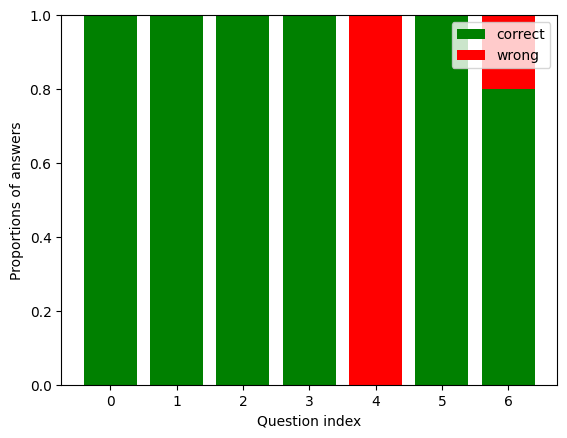

In [46]:
accuracy_analysis.plot()
plt.legend()
plt.show()

## Logscores

The logscore analysis is a tool that tries to quantify how much the model knows a text by heart. This can be particularly useful when doing questionnaires with language models as some questions might already be in the training corpus. With this method we can score how much the model has already seen the question (and thus maybe the answer to this question).

To do this we compute the logprobability of the sequence up to token t and plot it. If the model is very confident about its prediction the logprobability of the new tokens should be 0 (probability of 1) and therefore it will result in an horizontal graph on the areas the model knows the text.

We can thus visualize the graph (called loggraph) and also quantify how much horizontal the graph is by fitting a model on it such as :
$f(x) = A(1-exp(-Bx))$ and plot the parameters A and B.

In the previous study we used a prepend and a specific formatting. Here we are only interested in the text of the question and we don't want to add framing around it. A study subclassing the OneModelStudy with all the required configuration has already been defined setting all the required parameters.

Moreover for the example I have chosen specific texts to show the concept behind the logscores and their limitations.

In [47]:
from lanlab.studies.parametrized_studies.logscore import LogScoreStudy

ls_dataset = QuestionDatasetLoader()
ls_dataset.from_json(os.path.join('inputs','books.json'),QuestionLoader)

#Select a completion model
model = DV2()
ls_study = LogScoreStudy(ls_dataset,model,name='logscores')

ls_study.run()

INFO:root:Checking if the study already exists.
INFO:root:Found the study. Trying to load it and the data.


Now let's run the analysis

In [48]:
from lanlab.analyses.logscore.logscore_analysis import LogScoreAnalysis
import matplotlib.pyplot as plt

#Create the analysis object
logscore_analysis = LogScoreAnalysis(ls_study)

We can now visualize the logpgraphs

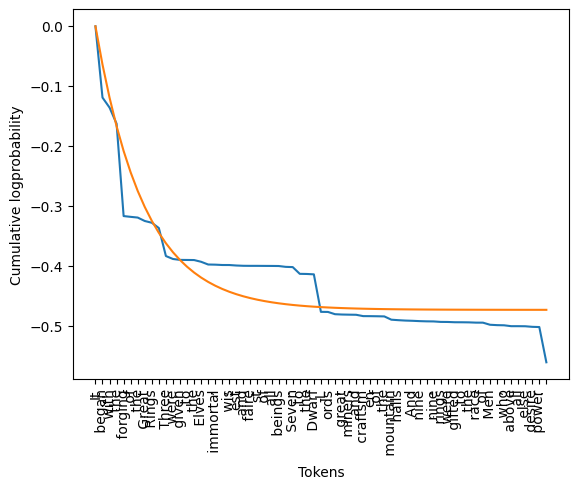

In [49]:
logscore_analysis.plot_index(0)

This is the loggraph for the first text. As you see it is very horizontal because it's an excerpt from The Lord of the Ring by J.R.R Tolkien. It's a very famous text and the model doesn't hesitate very much to complete it. The small bumps often come from punctuation as the model doesn't know at the beginning of the completion whether it should input a newline for every sentence or continue on the same line after the dot.

Here are all the loggraphs :

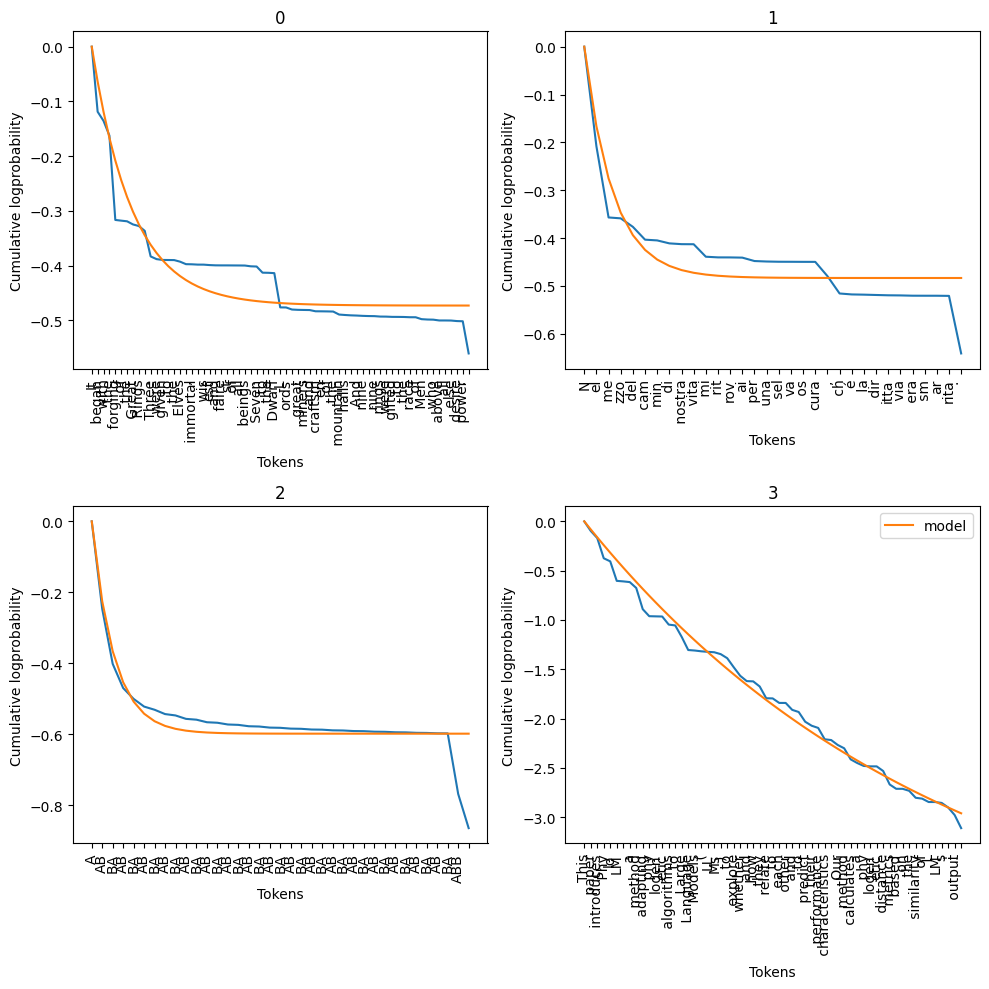

In [50]:
plt.figure(figsize=(10,10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    logscore_analysis.plot_index(i)
    ax.set_title(str(i))
plt.tight_layout()
plt.legend()
plt.show()

We clearly see that in all of the texts 0, 1 and 2 the model doesn't hesitate that much than in the text number 4. Indeed The first 2 are taken from famous books, the 3rd one has patterns than can easily be predicted and the 4th one is the beginning of a paper from arxiv posted recently.

In [51]:
for i,q in enumerate(ls_dataset):
    print('--- Text',i)
    print(q.generate())

--- Text 0
It began with the forging of the Great Rings. Three were given to the Elves, immortal, wisest and fairest of all beings. Seven to the Dwarf-Lords, great miners and craftsmen of the mountain halls. And nine, nine rings were gifted to the race of Men, who above all else desire power.

--- Text 1
Nel mezzo del cammin di nostra vita mi ritrovai per una selva oscura, ché la diritta via era smarrita.

--- Text 2
AABBAABBAABBAABBAABBAABBAABBAABBAABBAABBAABBAABBAABBAABBAABBAABBAABBAABB

--- Text 3
This paper introduces PhyloLM, a method adapting phylogenetic algorithms to Large Language Models (LLMs) to explore whether and how they relate to each other and to predict their performance characteristics. Our method calculates a phylogenetic distance metrics based on the similarity of LLMs' output.



There are 2 ways to produce an horizontal line : either the model knows perfectly the text or it can infer it from the context. This method is unable to differentiate the two. Even in the latter scenario shouldn't be as strong as the first one (like we can see in the 3rd loggraph the logprobs don't saturate as quickly as in the first two texts), we can find example where it saturates much quicker.

Therefore this method can be used to know if the model already knows the given text or if it can infer the rest of the text from its beginning. If one could ensure that the rest of the text cannot be guessed from the beginning (by avoiding asking questions such as completing the sequence AABBAABBAABBAABB) we get a tool that measures how much the model knows the input text.

Plot the parameters of the fitted models :

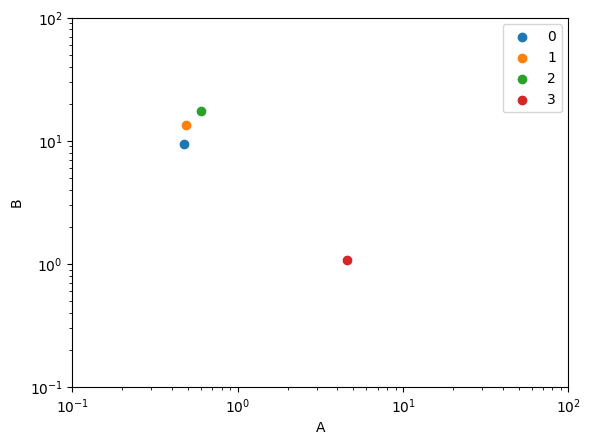

In [52]:
logscore_analysis.plot_comparison()
plt.legend()
plt.show()

We get one cluster with 0 1 and 2 and 3 is much farther. Empirically, if the value of A is around or less than $10^0$ and B is more than or close to $10^0$, there is a probable contamination.

Let's go back to our initial questionnaire.

In [53]:
from lanlab.analyses.logscore.logscore_analysis import LogScoreAnalysis

ls_dataset = QuestionDatasetLoader()
ls_dataset.from_json(os.path.join('inputs','test_questionnaire.json'),QuestionLoader)

ls_study = LogScoreStudy(ls_dataset,model,name='logscores')

ls_study.run(update_objects=True)

#Create the analysis object
logscore_analysis = LogScoreAnalysis(ls_study)

INFO:root:Checking if the study already exists.
INFO:root:Found the study. Trying to load it and the data.
INFO:root:Updated objects.


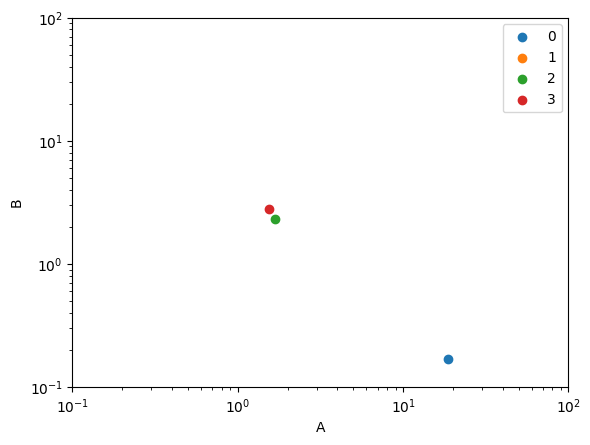

In [54]:
logscore_analysis.plot_comparison()
plt.legend()
plt.show()

We see probable contamination in 2 and 3 as they are close to 10^0 (careful it's a log scale - question 0 is quite far from 10^0). Let's see the loggraphs

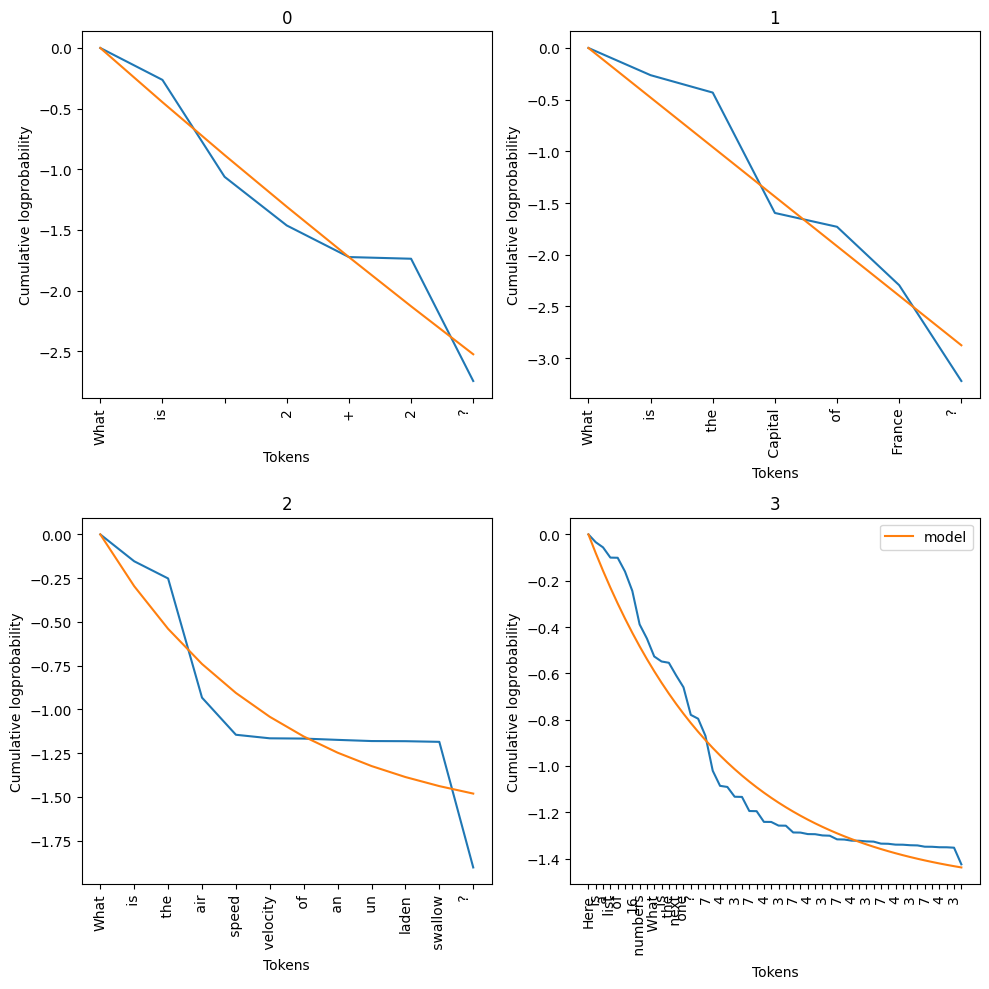

In [55]:
plt.figure(figsize=(10,10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    logscore_analysis.plot_index(i)
    ax.set_title(str(i))
plt.tight_layout()
plt.legend()
plt.show()

2 might be contaminated and indeed it's a famous quote so the model recognizes it (except the "?" at the end which surprises it very much). 3 is a case of in context learning as we can see it in the question.

In [56]:
for i,q in enumerate(ls_dataset):
    print('--- Text',i)
    print(q.generate())

--- Text 0
What is 2+2 ?

--- Text 1
What is the Capital of France ?

--- Text 2
What is the air speed velocity of an unladen swallow ?

--- Text 3
Here is a list of 16 numbers. What is the next one ? 7
4
3
7
4
3
7
4
3
7
4
3
7
4
3
7
4
3




# Saving and Time Capsule

In this framework when you run 
```python
study.run()
```
the results are stored in 2 files :
- data.json which contains the output data as well as some of the input data
- study.p which is a pickle version of the study object.

These files are stored in a path relative to the content of the training (names or study, dataset and model to be more precise).
If another study is run with the same pathing instead of running it will load the study.p file with the data in data.json. This is the concept the framework is based on for 
- Saving and Loading data accordingly (if you build a study with the same path as another that has already run) it means you are running the same study as the one before and the framework shouldn't compute the same data twice : it loads the previous one.
- Time capsule : it saves the environment in which you ran each experiment. Therefore you can load the exact environment even 10 years later to replicate old results when needed even if the framework has changed in between.

When creating a Study object and running it so that it loads a previous study it will drop the study object you built to load the study.p . If you want to update the study.p file you can use the ```python study.run(update_objects=True)``` parameter to keep the version of study you built and erase the study.p file to replace it with the study built.

If you don't want to load the data and recompute it you can use ```python study.run(update_data=True)```.

The default value of these parameters is False and both can be used together.

In [57]:
study.run(update_objects=True,update_data=True)

INFO:root:Checking if the study already exists.
INFO:root:Found the study. Trying to load it and the data.
INFO:root:Updated objects.
INFO:root:Generating the data.
INFO:root:Data generated.
INFO:root:Running the study.
INFO:root:Hub launched.
INFO:root:Queue filled.
INFO:root:Hub running.
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


First run (data are now discarded from the data.json file)


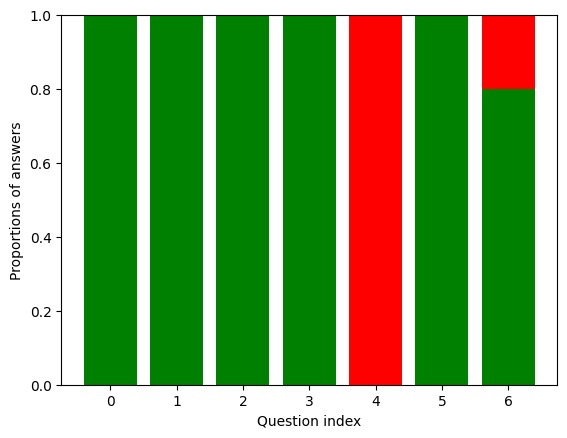

Second run (new data in the data.json file)


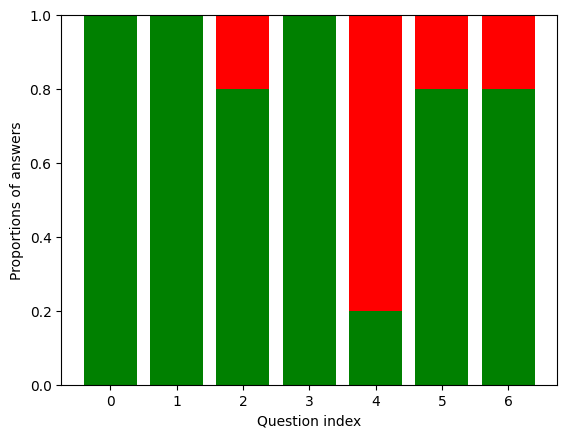

In [58]:
accuracy_analysis2 = AccuracyAnalysis(study)

print('First run (data are now discarded from the data.json file)')
accuracy_analysis.plot()
plt.show()

print('Second run (new data in the data.json file)')
accuracy_analysis2.plot()
plt.show()